In [1]:
%matplotlib inline
import torch
from ffebm.rws_testing import load_modules, test_one_batch, visual_samples_vae

CUDA = torch.cuda.is_available()
if CUDA:
    DEVICE = torch.device('cuda:1')
print('torch:', torch.__version__, 'CUDA:', CUDA)
pixel_dim = 784
hidden_dim = 128
latent_dim = 10
LOAD_VERSION = 'mnist-rws-%.2Elr-%.2Elatentdim' % (1e-4, latent_dim)
enc, dec = load_modules(pixel_dim, hidden_dim, latent_dim, LOAD_VERSION, CUDA, DEVICE)

torch: 1.3.0 CUDA: True
Initialize encoder and decoder and optimizer...
Load trained weights...


each row shows different samples of one MNIST image, where the true data image is at the rightmost columen 


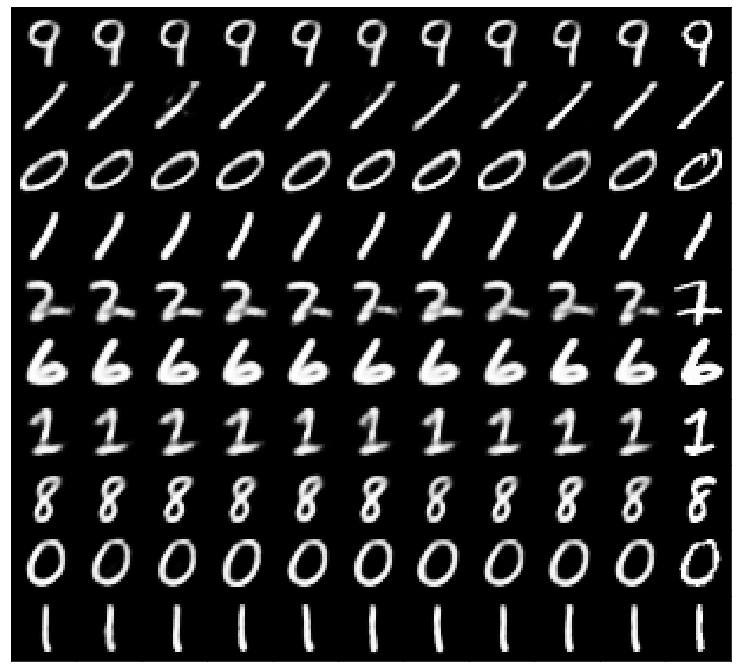

In [2]:
test_batch_size = 10
test_sample_size = 10
DATA_DIR = '/home/hao/Research/sebm_data/'
images, recon = test_one_batch(enc, dec, test_batch_size, test_sample_size, DATA_DIR, CUDA, DEVICE)
visual_samples_vae(images, recon)